# Univariate Analysis of the S&P 500 and the Sector Indices

We will create a visualization of the S&P 500, a main benchmark for the US financial markets and its constituent indices through time, focusing on creating an interactive, parameterized notebook for easy exploration. The objective is not to draw any inferences about why things happened but rather to allow one to quickly observe what has happened in various epochs. So, the analysis will be purely descriptive in nature. Towards the end of the assignment, you will begin to look at modeling the univariate series as a means of visually breaking down the components of the univariate time series in order to isolate the contributing factors.  For each graph, pay close attention to the labelling of the axis, titles, chart colors, and scale so that the graphs are easy to understand.



## Loading in the data

The data for the S&P500 index and its constituent sectors can be pulled directly via the pandas_datareader package.

Below we show the code for:
* Querying the SP500 index
* Querying the SP500 sectors

You will need to use the symbols to query the prices using the pandas datareader package. The documentation for the package can be found here:
* [pandas_datareader documentation](https://pydata.github.io/pandas-datareader/stable/remote_data.html).
* [pandas_datareader yahoo finance example](https://riptutorial.com/pandas/example/6232/datareader-basic-example--yahoo-finance-)

Run the following code in order to load the data and then proceed the questions. You will need the variables created during data creation to answer the questions.

In [ ]:
%load_ext google.colab.data_table

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

In [3]:
start_date = "2000-1-1"
end_date = datetime.today().strftime('%Y-%m-%d')
yfin.pdr_override()

# This line fetches the data and stores it into a pandas dataframe SP500. Take a look at the dataframe
SP500 = pdr.get_data_yahoo('SPY',
                       start=start_date,
                       end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [4]:
SP500

Date
2000-01-03     94.262581
2000-01-04     90.576317
2000-01-05     90.738358
2000-01-06     89.280037
2000-01-07     94.465088
                 ...    
2023-11-30    456.399994
2023-12-01    459.100006
2023-12-04    456.690002
2023-12-05    456.600006
2023-12-06    454.760010
Name: Adj Close, Length: 6021, dtype: float64

<Axes: xlabel='Date'>

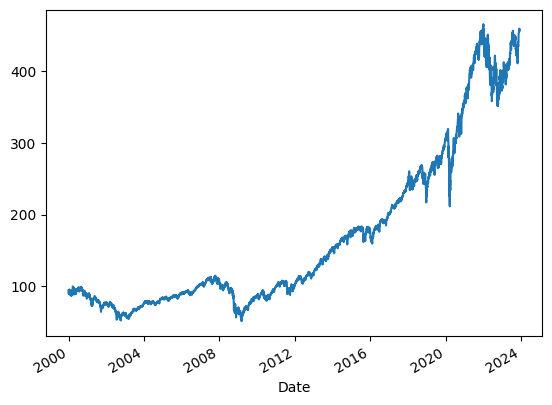

In [ ]:
# simple plot from within pandas (using default built-in quick plots. For the assignment, use any plotting library other than this built-in library.)
SP500.plot()

In [ ]:
# You can query the tickers just like for the S&P500 example above

real_estate = pdr.get_data_yahoo("XLRE",
                       start=start_date,
                       end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

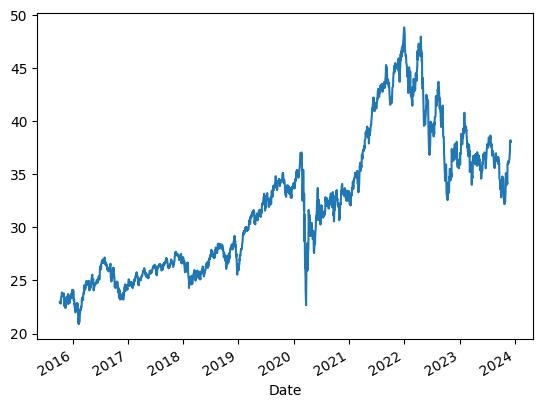

In [ ]:
real_estate.plot()

## Question 1: Log returns vs. simple returns

* **For the SP500, plot the density function for *simple daily returns* of the *adjusted close price* and another plot of the density function of *log returns* of the *adjusted close price*.**
You may overplot the density functions or use separate graphs. Think about what might cause any similarities or differences in the distributions and how to best highlight differences or similarities in the chart. For a nice overview on the differences between calculations, refer to this [article](https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/).

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Sample code for simple returns
sp500_simplereturns = SP500.pct_change()

# two ways of computing the log return
sp500_logreturns1 = np.log(1 + sp500_simplereturns)
sp500_logreturn2 = np.diff(np.log(SP500))


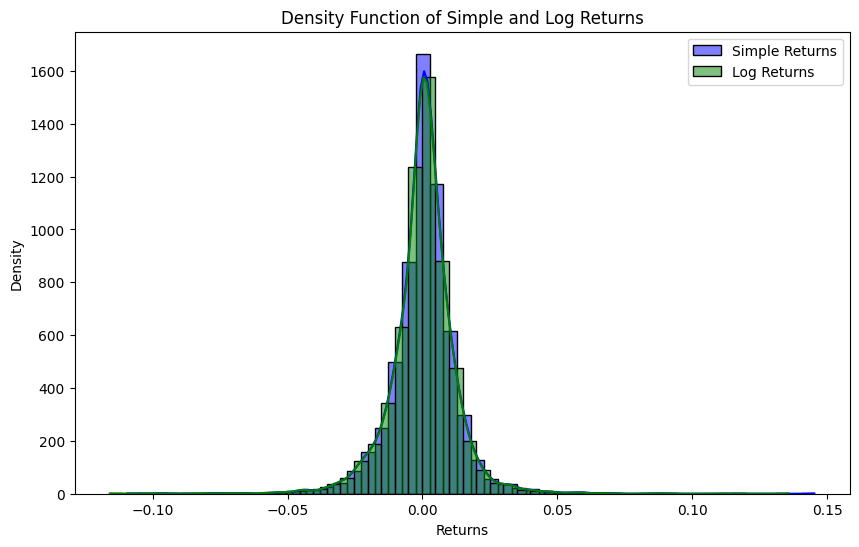

In [8]:
## Your code here
plt.figure(figsize=(10, 6))
# Plot density function for simple daily returns
sns.histplot(sp500_simplereturns, kde=True, color='blue', bins=50, label='Simple Returns')

# Plot density function for log returns
sns.histplot(sp500_logreturns1, kde=True, color='green', bins=50, label='Log Returns')

# Add labels and title
plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Density Function of Simple and Log Returns')
plt.legend()
plt.show()

## Question 2: Partitioning by date ranges

We would like understand how the distribution changes by date for each sector.
* **Create a plot of the *sector log return distribution* chosen in the dropdown filtered by the date range.**

The code provided creates 3 parameters. The first parameter selects which sector to plot. The second and third allow you to specify a date range (start date and end date). This is the way that you will create parameterized plots from now on.

After you create the graph, spend some time playing around with the chart, dropdown, and date filter. Some questions you might think about when you are looking at the graphs are:
* Do you notice any differences between sector returns when you filter by date?
* How about for short periods after an event such as the first month after the first known case of covid-19?
* What did sectors returns look like after the global financial crisis?
* Are sector returns stable over time?
(Don't answer the questions at this time, just complete the code, look at the charts, and learn how to interpret what you have plotted.)

In [45]:
#@title **Sector Log Return Distributions** { run: "auto" }
#@markdown
#@markdown Parameters

sector = "XLC" #@param [ "XLE", "XLB", "XLI", "XLY", "XLP", "XLV", "XLF", "XLK", "XLC", "XLU", "XLRE"]{type:"string"}
start_date = '2000-01-01' #@param {type:"date"}
end_date = '2021-1-1' #@param {type:"date"}


## Your question 3 graph code goes here
import plotly.express as px

def get_sector_log_returns(sector_ticker, start_date, end_date):
    sector_data = yfin.download(sector_ticker, start=start_date, end=end_date)
    log_returns = np.log(1 + sector_data['Adj Close'].pct_change()).dropna()
    return log_returns

# Get log returns for the selected sector and date range
sector_log_returns = get_sector_log_returns(sector, start_date, end_date)

fig = px.histogram(sector_log_returns, x='Adj Close', nbins=50,
                   labels={'x': 'Log Returns'},
                   title=f'{sector} Log Return Distribution ({start_date} to {end_date})')

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


## Time series analysis

The above graphs look at the distribution regardless of time. The date range filter you created above for the sector distributions let you view how the distribution changes over time. Now let's look directly at the time series plots of each individual series to see how the price series evolves over time.

### Question 3: Time series plots

* **Create a time series plot of each sector's adjusted close price**

Selecting a sector from the drop down parameterized plot should graph the time series of the selected sector. The objective for this question is to create a quick way to view the time series chart for any sector within any date range.



[*********************100%%**********************]  1 of 1 completed


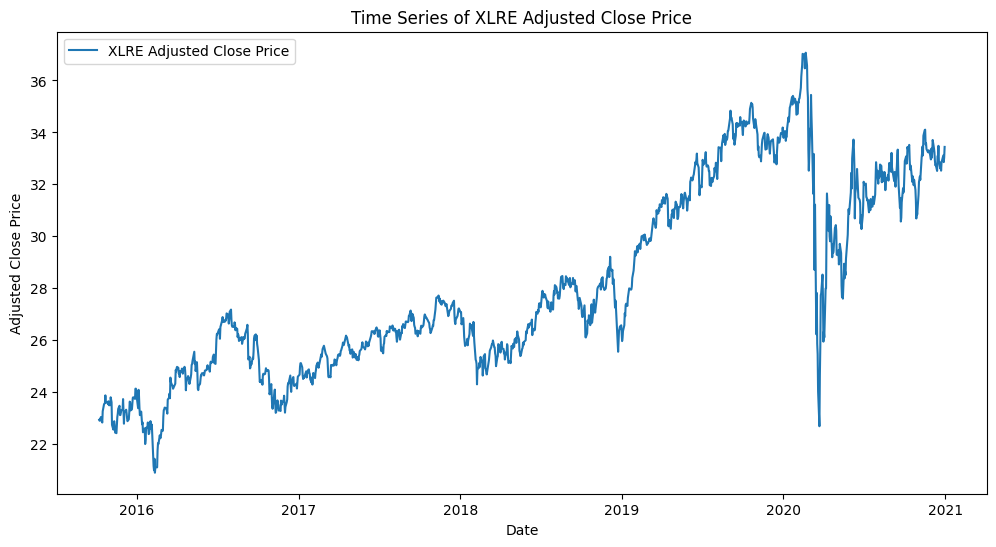

In [14]:
#@title **Sector Time Series Graphs** { run: "auto" }
#@markdown
#@markdown Parameters

sector = "XLRE" #@param [ "XLE", "XLB", "XLI", "XLY", "XLP", "XLV", "XLF", "XLK", "XLC", "XLU", "XLRE"]{type:"string"}
start_date = '2000-1-1' #@param {type:"date"}
end_date = '2021-1-1' #@param {type:"date"}

# ASSIGNMENT CODE HERE: Your code to graph the selected sector goes here !!!
sector_data = pdr.get_data_yahoo(sector, start=start_date, end = end_date)

plt.figure(figsize=(12, 6))
plt.plot(sector_data.index, sector_data['Adj Close'], label=f'{sector} Adjusted Close Price')

plt.title(f'Time Series of {sector} Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()




### Question 4: Cycle plots

Cycle plots are often used in investment management in order to look at seasonality and to compare and contrast different epochs. We are going to create a quick way to look at sector performance by month.
* **For the selected sector and date range, calculate that sector's *log returns by month (Raw)* and plot the performance for each year in the date range as a heatmap table.**


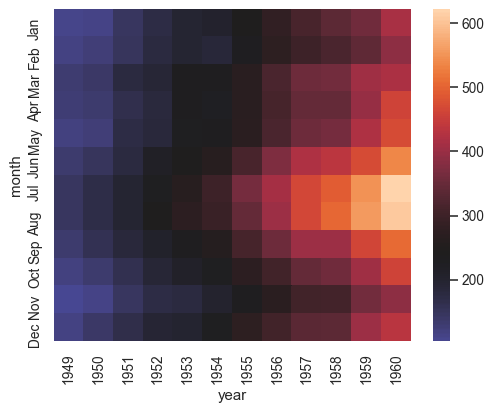

The seaborn heatmap package is recommended for creating the heatmap ([documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)). However, feel free to use any plotting library.



In [34]:
#@title **Sector Time Cycle Plots** { run: "auto" }
#@markdown
#@markdown Parameters

sector = "XLE" #@param [ "XLE", "XLB", "XLI", "XLY", "XLP", "XLV", "XLF", "XLK", "XLC", "XLU", "XLRE"]{type:"string"}
start_date = '2000-1-1' #@param {type:"date"}
end_date = '2023-1-1' #@param {type:"date"}

yfin.pdr_override()

### ASSIGNMENT CODE HERE: write your visualization code below this line
#----------------------------------------------------------------------
sector = pdr.get_data_yahoo(sector,
                       start=start_date,
                       end=end_date)

## calculate log return
monthly_returns = sector.resample('M').ffill().pct_change()
monthly_returns


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,-0.021480,-0.035469,-0.019139,-0.042334,-0.042334,-0.209646
2000-03-31,0.146341,0.138197,0.143902,0.120669,0.124424,6.819427
2000-04-30,0.010638,-0.009901,-0.014925,-0.014925,-0.014925,-0.915592
2000-05-31,0.054737,0.088421,0.084416,0.117424,0.117424,1.164151
...,...,...,...,...,...,...
2022-08-31,0.035280,0.040427,0.033517,0.026524,0.026524,0.128456
2022-09-30,-0.091001,-0.107771,-0.096529,-0.105342,-0.095587,-0.256158
2022-10-31,0.227020,0.248699,0.237661,0.249653,0.249653,0.372415


In [35]:
import datetime
monthly_returns = monthly_returns.reset_index()
monthly_returns['Date'] = pd.to_datetime(monthly_returns['Date'])
monthly_returns['year'], monthly_returns['month'] = monthly_returns['Date'].dt.year, monthly_returns['Date'].dt.month
monthly_returns = monthly_returns.drop(['Date'], axis=1)

In [36]:
monthly_returns.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
year           int64
month          int64
dtype: object

In [37]:
monthly_returns = pd.pivot_table(monthly_returns, values='Adj Close',
                     index=['month'],
                     columns='year')

<Axes: xlabel='year', ylabel='month'>

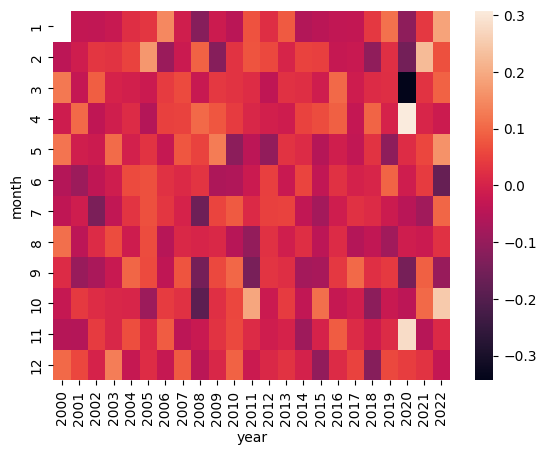

In [38]:
sns.heatmap(monthly_returns)

### Question 5: Time series components(Optional)

---



Now let us perform classical time series decomposition on the daily time series of the adjusted close price for each stock.

* **Plot a time series decomposition with trend, seasonality, and cyclical components using Facebook's Prophet time series library.** The chart should have a trend and cyclical components like below but you should make 3 *separate graphs* using a library of your choosing. Hint: take a look at the `forecast` dataframe.


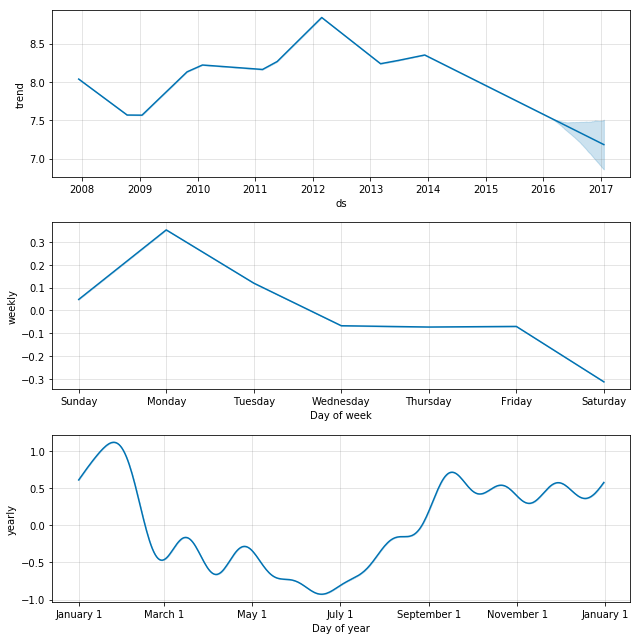

Think about what each of the time series components are indicating. The forecast is completely unimportant at this stage. Instead, focus on the trend, cyclical, and seasonal components. Think about how they compare and contrast to other sectors. Also, think about why certain sectors like energy might have seasonality patterns.

## Assignment comments
What you have just created is an interactive notebook that lets anyone view stock market returns by sector and date as:
* distribution of log returns
* time series
* time series decomposition

This univariate visualization of stock market data is already more sophisticated than many of the headline financial news sites which only quote the latest prices and change in prices.


